In [1]:
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sys
import sklearn
import os
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x1eae0a746a0>)

In [3]:
data = pd.read_csv("housing.csv")
housing_data = data

In [4]:
df = housing_data[['longitude','latitude','median_income']]

In [5]:
df

,longitude,latitude,median_income
0,-122.23,37.88,8.3252
1,-122.22,37.86,8.3014
2,-122.24,37.85,7.2574
3,-122.25,37.85,5.6431
4,-122.25,37.85,3.8462
...,...,...,...
20635,-121.09,39.48,1.5603
20636,-121.21,39.49,2.5568
20637,-121.22,39.43,1.7000
20638,-121.32,39.43,1.8672


Saving figure california_housing_prices_plot


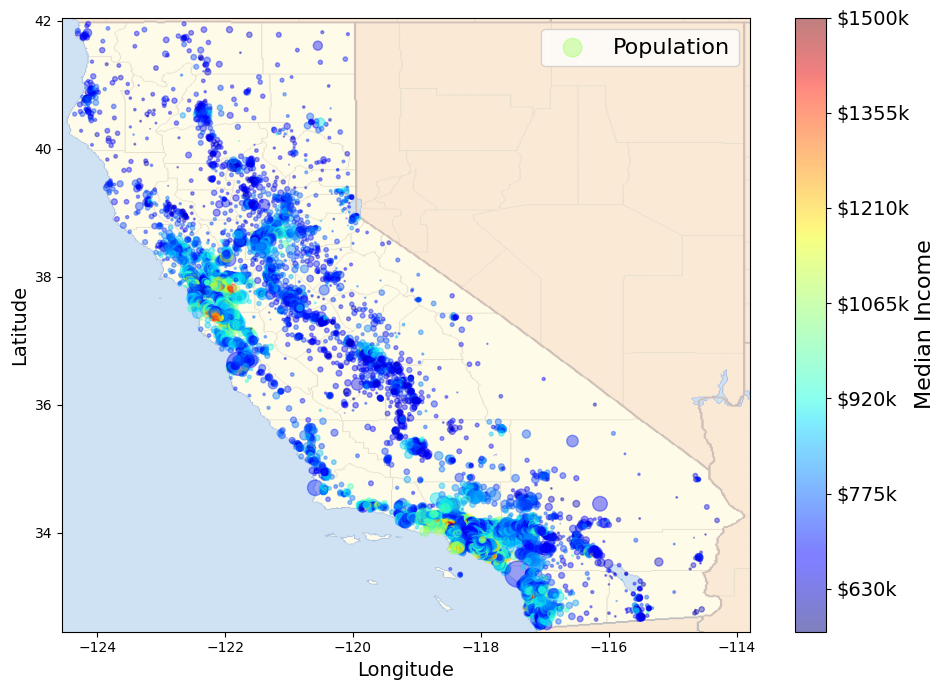

In [6]:
import matplotlib.image as mpimg

california_img=mpimg.imread(os.path.join(images_path, filename))

ax = housing_data.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing_data['population']/100, label="Population",
                  c="median_income", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

income = housing_data["median_income"]
tick_values = np.linspace(income.min(), income.max(), 11)
cbar = plt.colorbar(ticks=tick_values/income.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v*100)) for v in tick_values], fontsize=14)
cbar.set_label('Median Income', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

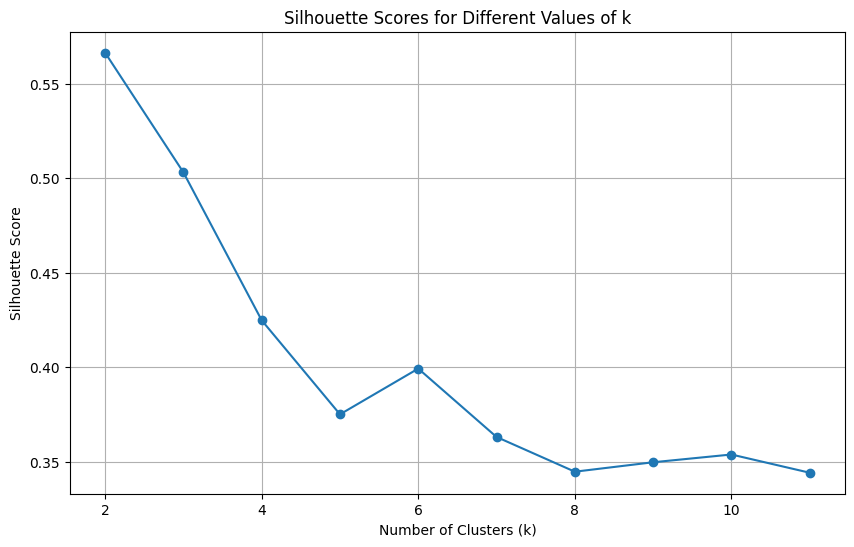

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define a range for the number of clusters
k_range = range(2, 12)
silhouette_scores = []

# Loop through each k and calculate the silhouette score
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df, labels))

# Plot the silhouette scores to identify the optimal k
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [8]:
silhouette_scores

[0.566509491976379,
 0.5031377784870003,
 0.4247926677439002,
 0.3749949646906784,
 0.3992171526811026,
 0.3630109352030457,
 0.34461644721751933,
 0.349615480187443,
 0.3537229861930058,
 0.3440756561997694]

In [9]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df)
                for k in range(1, 12)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [10]:
inertias

[251501.78859624662,
 101042.11682271687,
 73393.53387585166,
 56518.08499413776,
 47169.01817544222,
 39488.53783321514,
 34708.8801674126,
 30739.41133943071,
 27670.509117245947,
 25235.52092053478,
 23218.219335203135]

Saving figure inertia_vs_k_plot


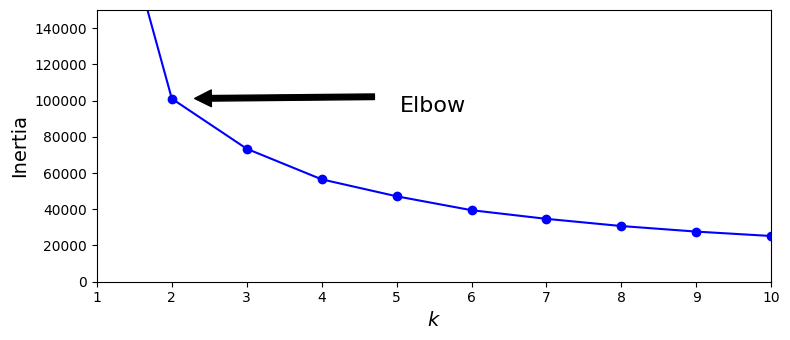

In [11]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 12), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.5, 0.65),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 10, 0, 150000])
save_fig("inertia_vs_k_plot")
plt.show()

In [12]:
kmeans.labels_

array([3, 3, 3, ..., 8, 9, 8])

In [13]:
def fit_plot_kmean(df,k):
    trial_k = k
    
    kmeans = KMeans(n_clusters=trial_k, random_state=42)
    kmeans.fit(df)
    labels = kmeans.labels_
    
    df['Cluster'] = labels
    
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df, x='longitude', y='latitude', hue='Cluster', palette='tab10', alpha=0.5)
    plt.title(f'K-Means Clustering with k={trial_k}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
    
    cluster_summary = df.groupby('Cluster')['median_income'].agg(['count', 'mean']).reset_index()
    print(cluster_summary)
    
    df = housing_data[['latitude','longitude','median_income']]

In [14]:
df

,longitude,latitude,median_income
0,-122.23,37.88,8.3252
1,-122.22,37.86,8.3014
2,-122.24,37.85,7.2574
3,-122.25,37.85,5.6431
4,-122.25,37.85,3.8462
...,...,...,...
20635,-121.09,39.48,1.5603
20636,-121.21,39.49,2.5568
20637,-121.22,39.43,1.7000
20638,-121.32,39.43,1.8672


In [15]:
import seaborn as sns

C:\Users\Roy\AppData\Local\Temp\ipykernel_41356\649567434.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = labels


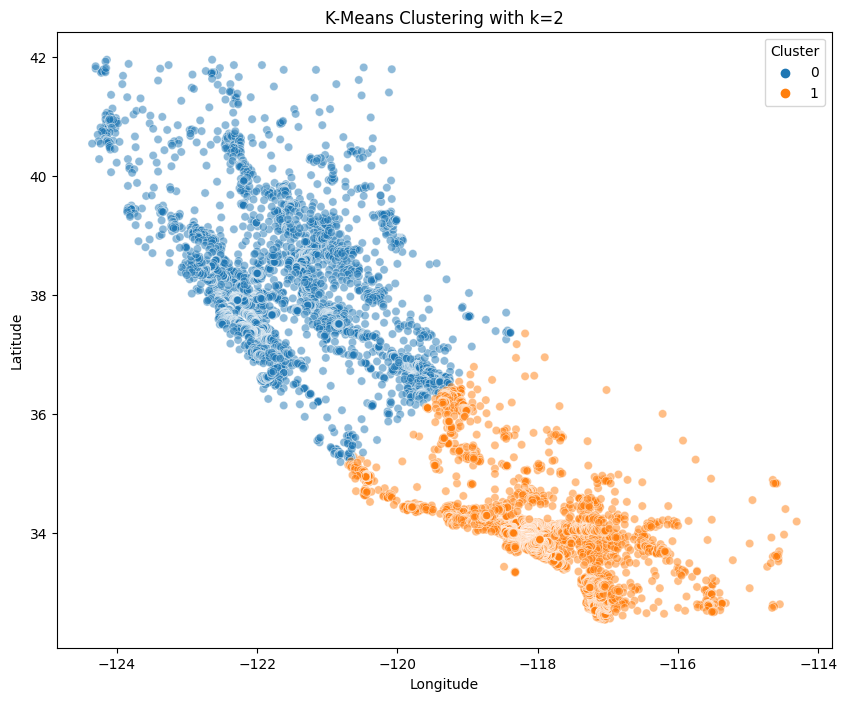

   Cluster  count      mean
0        0   8697  3.799830
1        1  11943  3.922258


C:\Users\Roy\AppData\Local\Temp\ipykernel_41356\649567434.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = labels


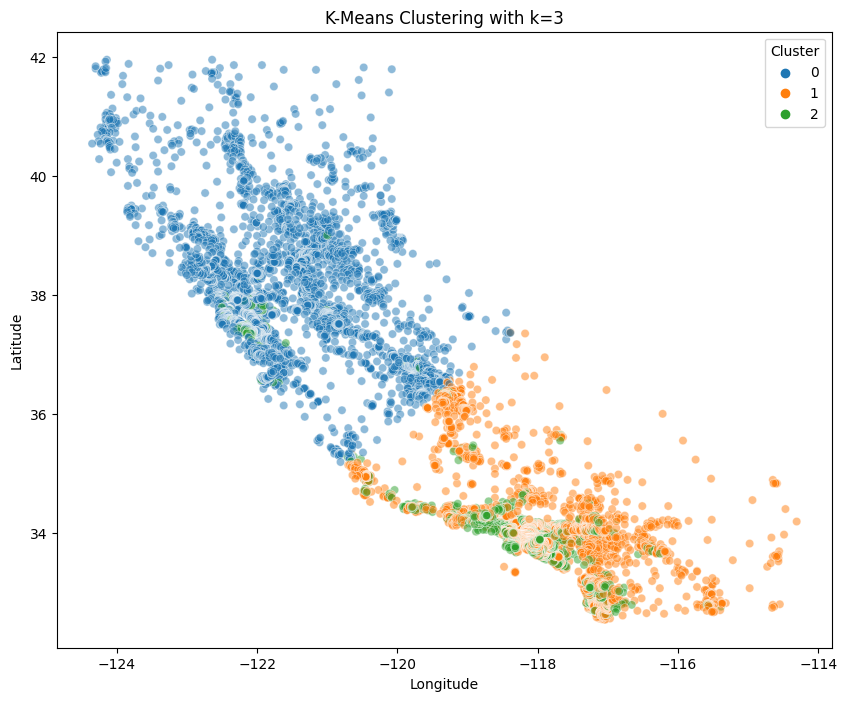

   Cluster  count      mean
0        0   8515  3.662935
1        1   9652  3.204568
2        2   2473  7.185712


C:\Users\Roy\AppData\Local\Temp\ipykernel_41356\649567434.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = labels


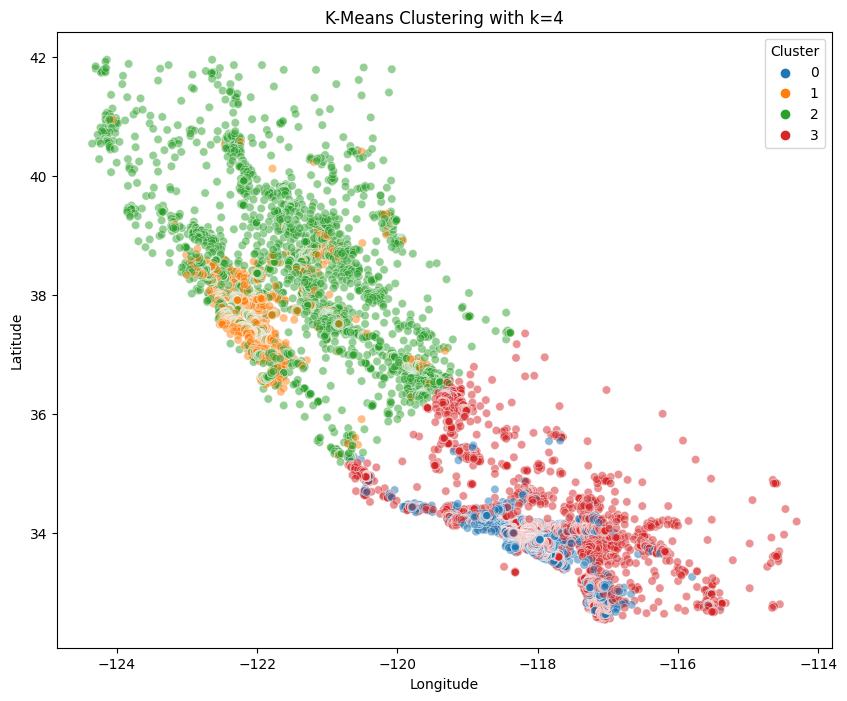

   Cluster  count      mean
0        0   2748  6.626858
1        1   2390  6.123529
2        2   6297  2.919753
3        3   9205  3.113430


C:\Users\Roy\AppData\Local\Temp\ipykernel_41356\649567434.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = labels


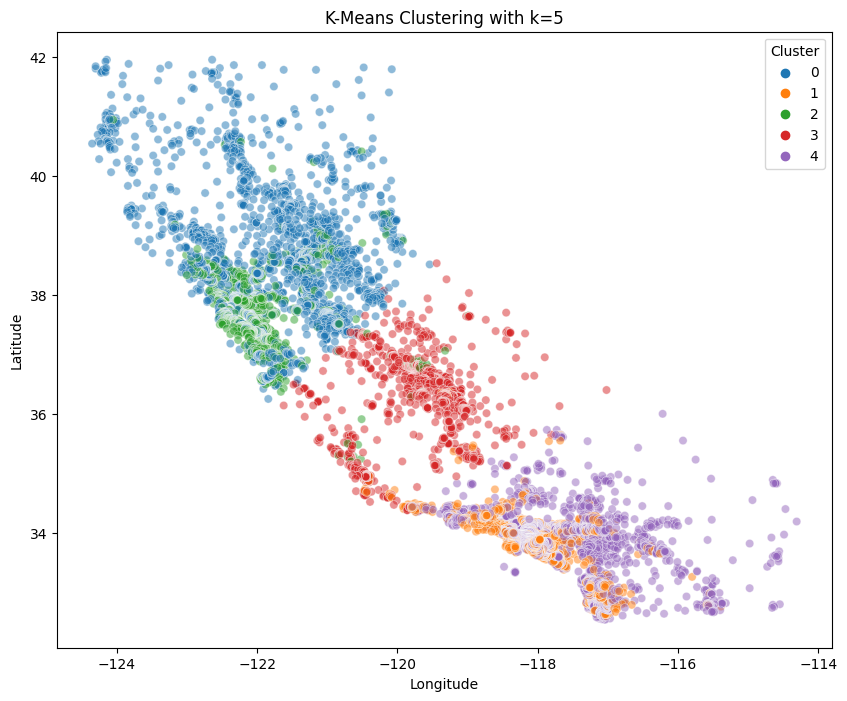

   Cluster  count      mean
0        0   5434  2.971810
1        1   2742  6.627351
2        2   2380  6.133931
3        3   1642  2.630639
4        4   8442  3.156997


C:\Users\Roy\AppData\Local\Temp\ipykernel_41356\649567434.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = labels


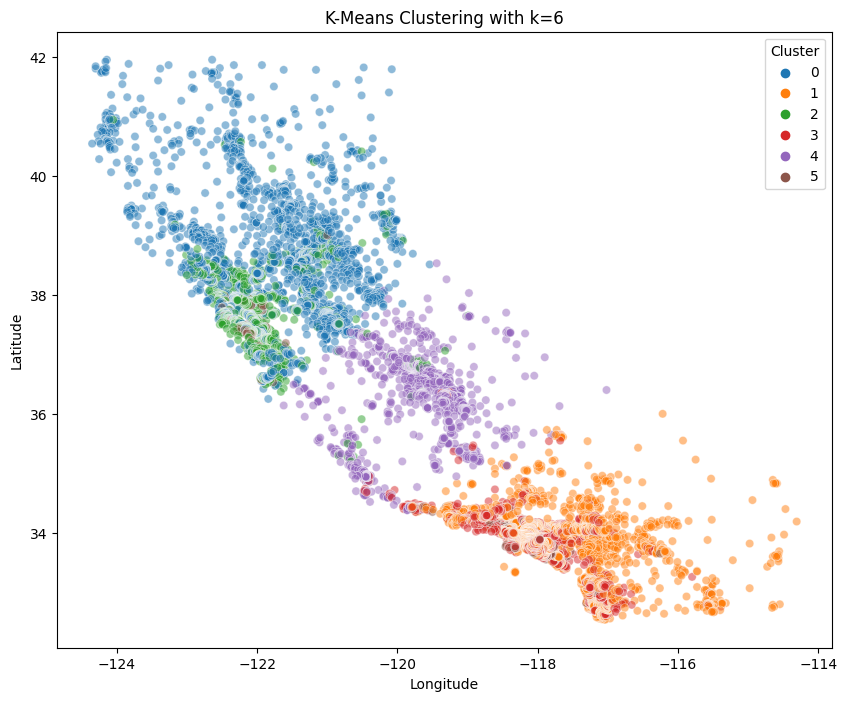

   Cluster  count       mean
0        0   5434   2.971810
1        1   8442   3.156997
2        2   2244   5.816210
3        3   2503   6.171626
4        4   1646   2.636174
5        5    371  11.461360


C:\Users\Roy\AppData\Local\Temp\ipykernel_41356\649567434.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = labels


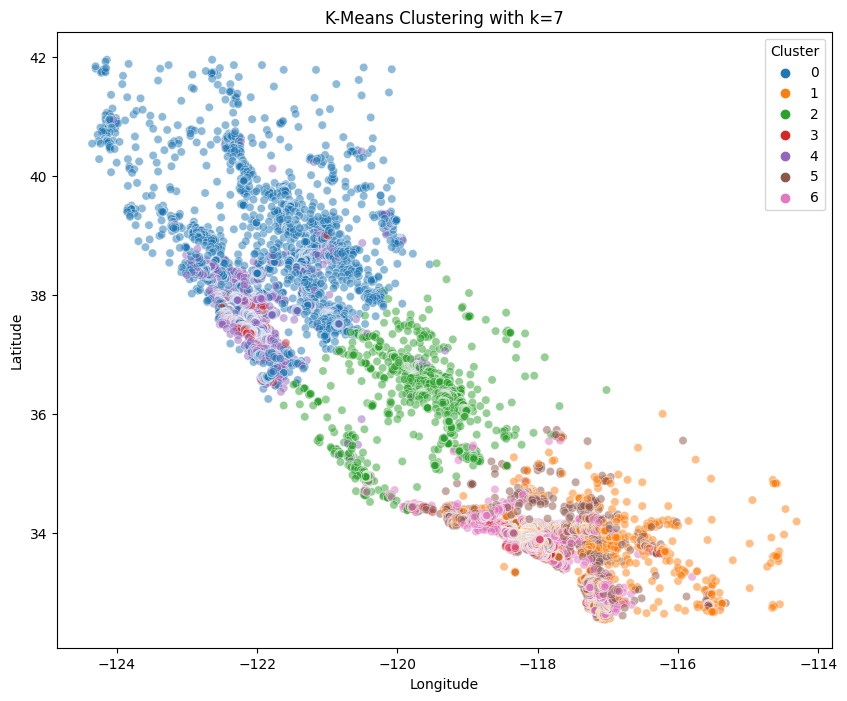

   Cluster  count       mean
0        0   5434   2.971810
1        1   3943   2.286411
2        2   1647   2.637951
3        3    371  11.461360
4        4   2244   5.816210
5        5   4499   3.919994
6        6   2502   6.171870


In [16]:
for i in range(2,8):
    fit_plot_kmean(df,i)

In [17]:
df

,longitude,latitude,median_income,Cluster
0,-122.23,37.88,8.3252,4
1,-122.22,37.86,8.3014,4
2,-122.24,37.85,7.2574,4
3,-122.25,37.85,5.6431,4
4,-122.25,37.85,3.8462,0
...,...,...,...,...
20635,-121.09,39.48,1.5603,0
20636,-121.21,39.49,2.5568,0
20637,-121.22,39.43,1.7000,0
20638,-121.32,39.43,1.8672,0


Saving figure silhouette_analysis_plot


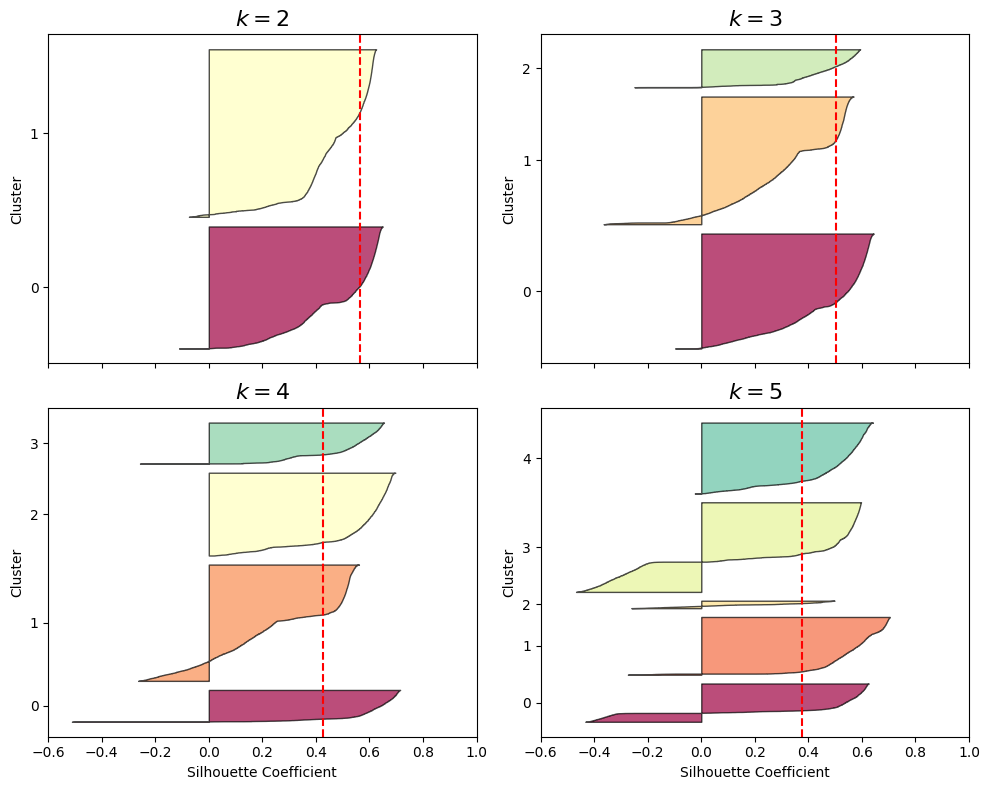

In [18]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(10, 8))

for k in (2, 3, 4, 5):
    plt.subplot(2, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(df, y_pred)

    padding = len(df) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor='black', alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 3):
        plt.ylabel("Cluster")
        plt.gca().set_xticks([-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
        
        
    
    if k in (4, 5):
        plt.gca().set_xticks([-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
        plt.ylabel("Cluster")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()

### DBSCAN

In [19]:
df = housing_data[['longitude', 'latitude', 'median_income']]

In [20]:
df

,longitude,latitude,median_income
0,-122.23,37.88,8.3252
1,-122.22,37.86,8.3014
2,-122.24,37.85,7.2574
3,-122.25,37.85,5.6431
4,-122.25,37.85,3.8462
...,...,...,...
20635,-121.09,39.48,1.5603
20636,-121.21,39.49,2.5568
20637,-121.22,39.43,1.7000
20638,-121.32,39.43,1.8672


C:\Users\Roy\AppData\Local\Temp\ipykernel_41356\3227263528.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DBSCAN_Cluster'] = dbscan_labels


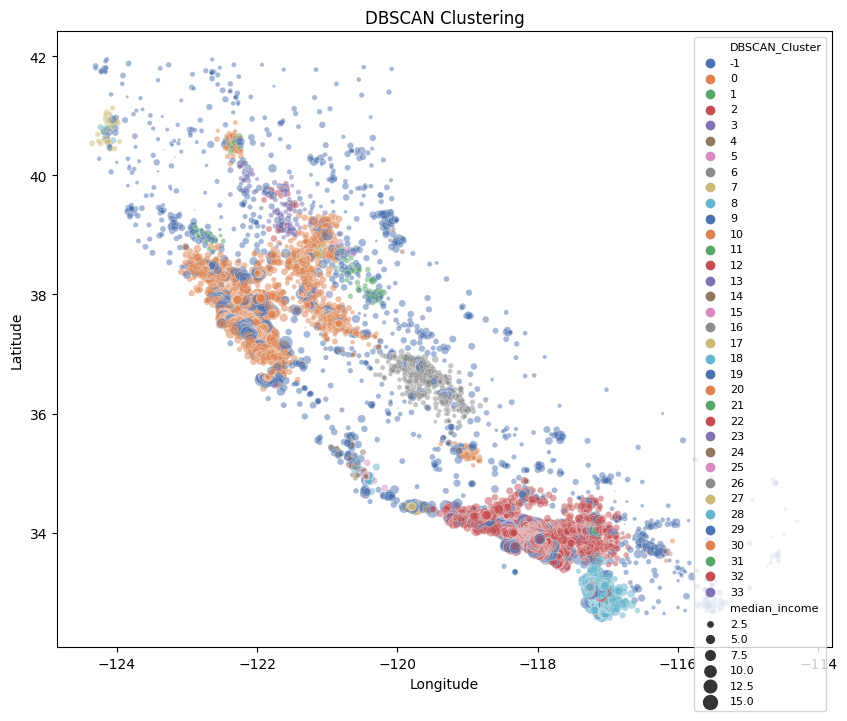

In [21]:
from sklearn.cluster import DBSCAN

df = housing_data[['longitude', 'latitude', 'median_income']]
# Fit the DBSCAN model
dbscan = DBSCAN(eps=0.25, min_samples=12)
dbscan_labels = dbscan.fit_predict(df)

df['DBSCAN_Cluster'] = dbscan_labels
# Visualize DBSCAN clusters


plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='DBSCAN_Cluster', size='median_income', sizes=(1,100),
                palette='deep', alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper right',fontsize=8)
plt.show()

In [22]:
cluster_summary = df.groupby('DBSCAN_Cluster')['median_income'].agg(['count', 'mean']).reset_index()
print(cluster_summary.to_string())

    DBSCAN_Cluster  count       mean
0               -1   2228   4.609758
1                0   6077   3.921807
2                1     65   2.600432
3                2     25   3.029644
4                3    193   2.089490
5                4     15   2.088633
6                5      9   2.960522
7                6    787   2.584726
8                7     80   2.392607
9                8      9   3.458344
10               9     50   1.816624
11              10    213   2.426155
12              11     45   1.865662
13              12   8680   3.876371
14              13     31  15.000097
15              14     17   2.597229
16              15      7   4.191071
17              16     22  10.199595
18              17     22   6.213195
19              18   1529   3.606335
20              19     73   3.074619
21              20     10   2.245610
22              21     14   6.202507
23              22     21   7.562343
24              23     26   5.020958
25              24    107   2.610771
2

In [23]:
cluster_summary.sort_values('count',ascending=False).head(35)

,DBSCAN_Cluster,count,mean
13,12,8680,3.876371
1,0,6077,3.921807
0,-1,2228,4.609758
19,18,1529,3.606335
7,6,787,2.584726
11,10,213,2.426155
4,3,193,2.089490
25,24,107,2.610771
31,30,82,2.196978
8,7,80,2.392607
